In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 63.2 MB/s eta 0:00:00


In [ ]:

from ultralytics import YOLO

# 2. Load pretrained YOLOv8n (good for small medical datasets)
model = YOLO("yolov8s.pt")
model.info()

YOLOv8s summary: 129 layers, 11,166,560 parameters, 0 gradients, 28.8 GFLOPs


(129, 11166560, 0, 28.816844800000002)

# TRAINING br35H on yolov8s

In [ ]:
# 3. Train with early stopping

results = model.train(
    data="/content/drive/MyDrive/brain_tumor_det/br35h.yaml",   # path to your dataset yaml
    imgsz=640,           # input size
    epochs=80,           # *max* epochs; training may stop earlier
    batch=4,             # small batch for limited VRAM
    optimizer="SGD",     # aligns with STAR-YOLO setup
    lr0=0.001,           # initial LR
    patience=10,         # stop if no val improvement for 10 epochs
    verbose=True,
    save=True,
    project="/content/drive/MyDrive/runs_yolov8s",

)

Ultralytics 8.3.247 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/brain_tumor_det/br35h.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=10, perspective=0.0

# EVALUATION of model

In [ ]:
from ultralytics import YOLO
import numpy as np

# 1. Load your trained model
model = YOLO("/content/drive/MyDrive/runs_yolov8s/train2/weights/best.pt")

# 2. Run validation
metrics = model.val(data="/content/drive/MyDrive/brain_tumor_det/br35h.yaml",
                    split="test",
                  project="/content/drive/MyDrive/brain_tumor_det/runs_v8s_br35h",
    name="val")

# 3. Convert arrays to scalars (mean over classes)
prec  = float(np.mean(metrics.box.p))       # precision
rec   = float(np.mean(metrics.box.r))       # recall
map50 = float(np.mean(metrics.box.map50))   # mAP@0.5
map   = float(np.mean(metrics.box.map))     # mAP@0.5:0.95

print(f"Precision:     {prec:.4f}")
print(f"Recall:        {rec:.4f}")
print(f"mAP50:         {map50:.4f}")
print(f"mAP50-95:      {map:.4f}")

print("\nAll metrics dict:")
print(metrics.results_dict)


Ultralytics 8.3.247 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 2.2±2.7 ms, read: 0.1±0.0 MB/s, size: 40.7 KB)
val: Scanning /content/drive/MyDrive/brain_tumor_det/BR35H_roboflow_boxes/labels/test.cache... 80 images, 15 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 80/80 94.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 5/5 11.3s/it 56.3s
                   all         80         70      0.808      0.843      0.799      0.674
Speed: 2.8ms preprocess, 10.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to /content/drive/MyDrive/brain_tumor_det/runs_v8s_br35h/val2
Precision:     0.8078
Recall:        0.8429
mAP50:         0.7987
mAP50-95:      0.6743

All metrics dict:
{'metrics/precision(B)': 0.8077704368602725, 'metrics/recall(B)': 0.8428571428571429, 'metrics/mAP50(B

results.png


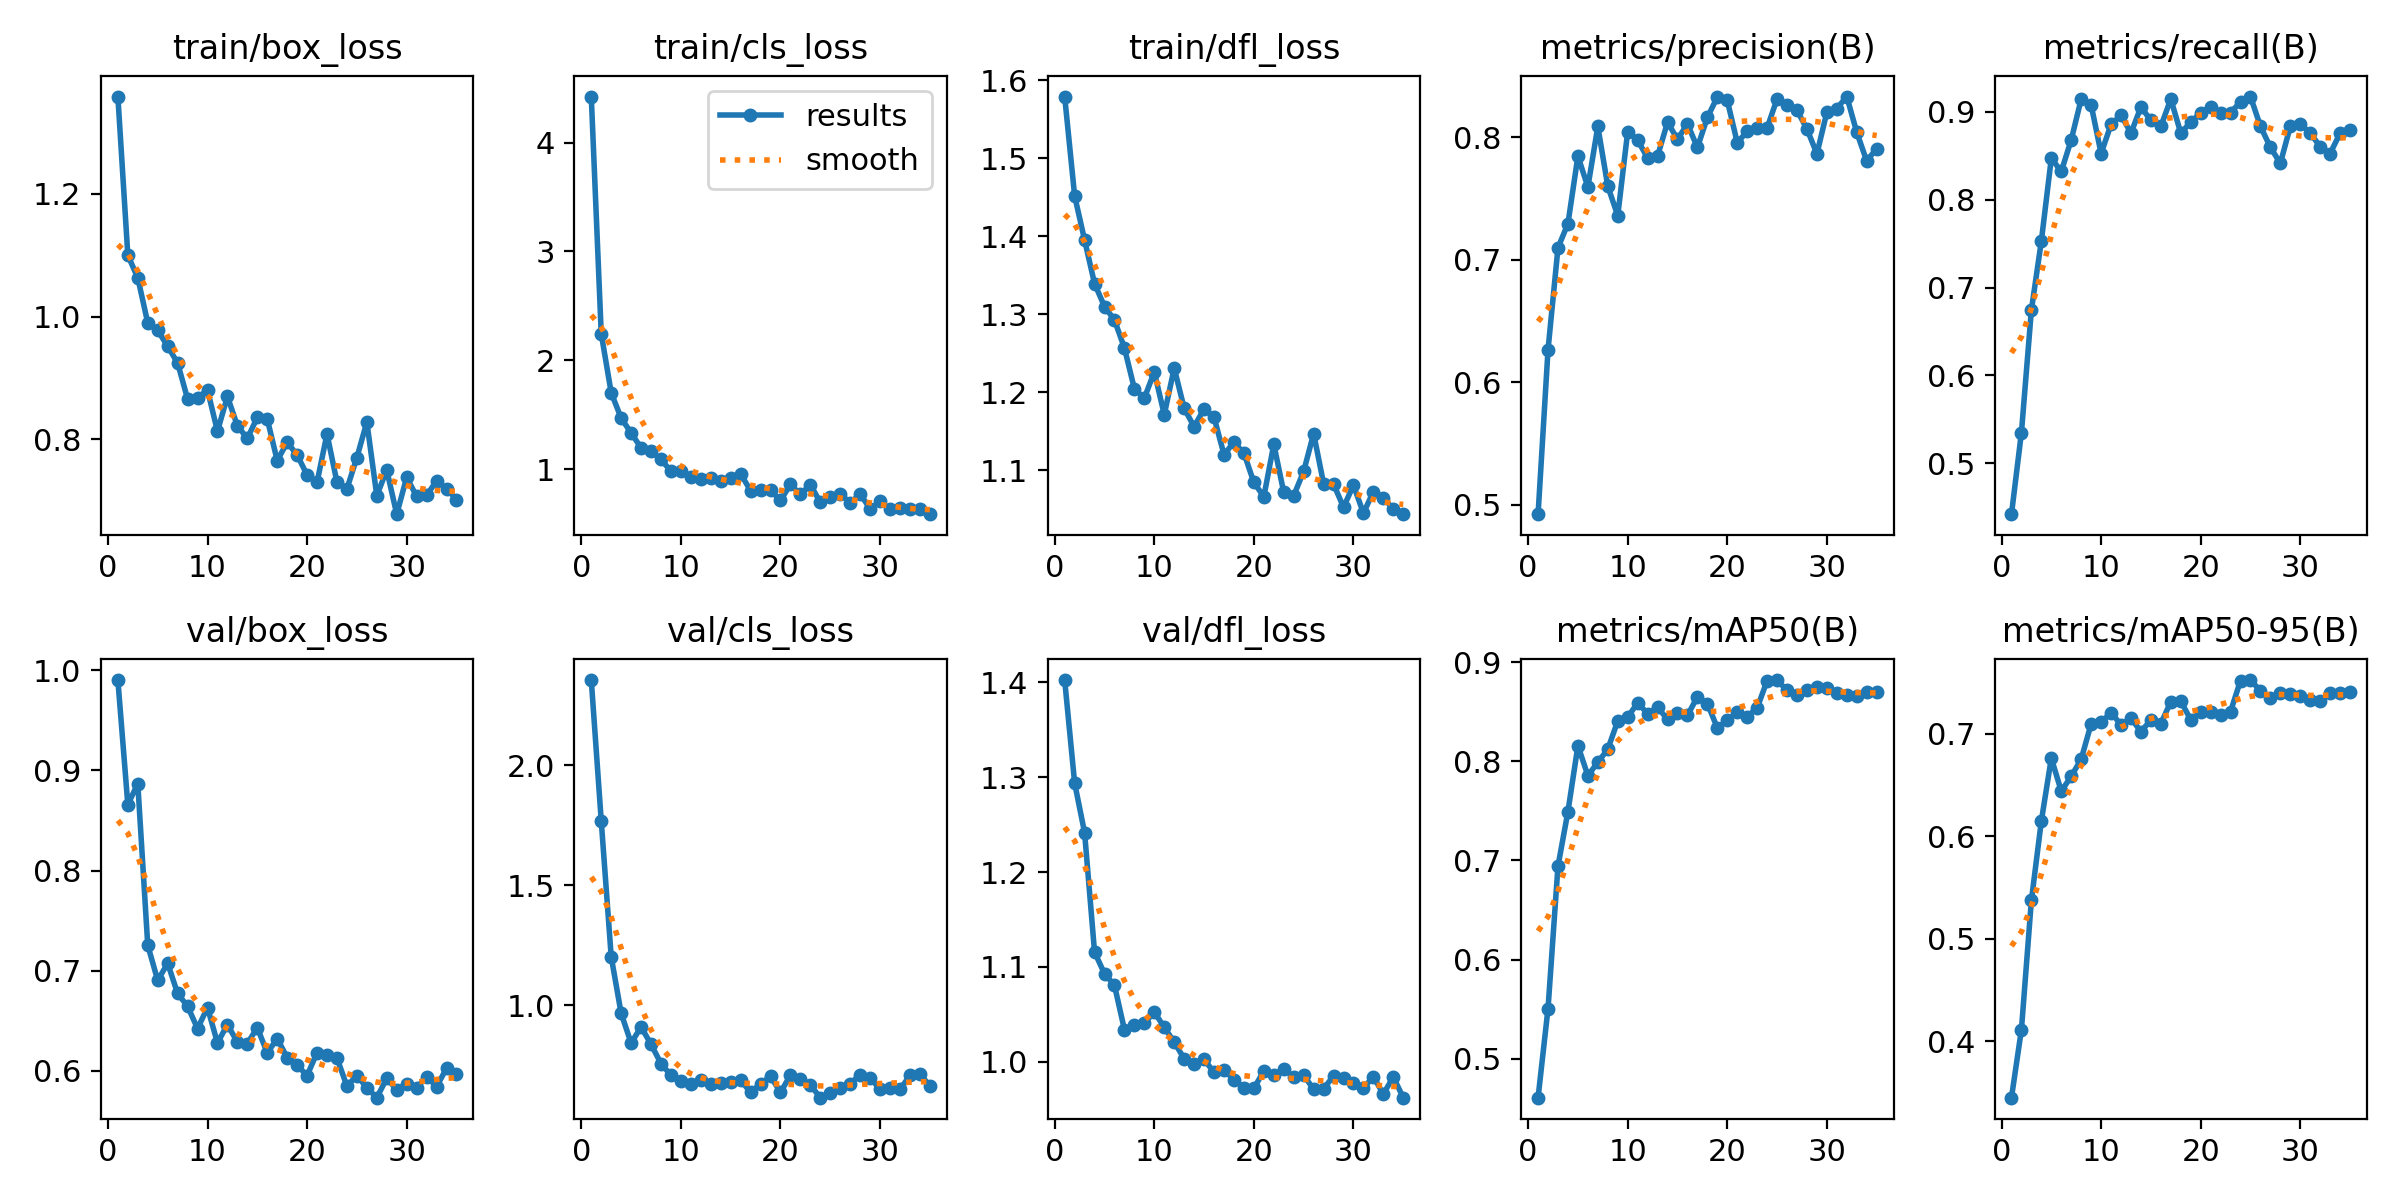

confusion_matrix.png


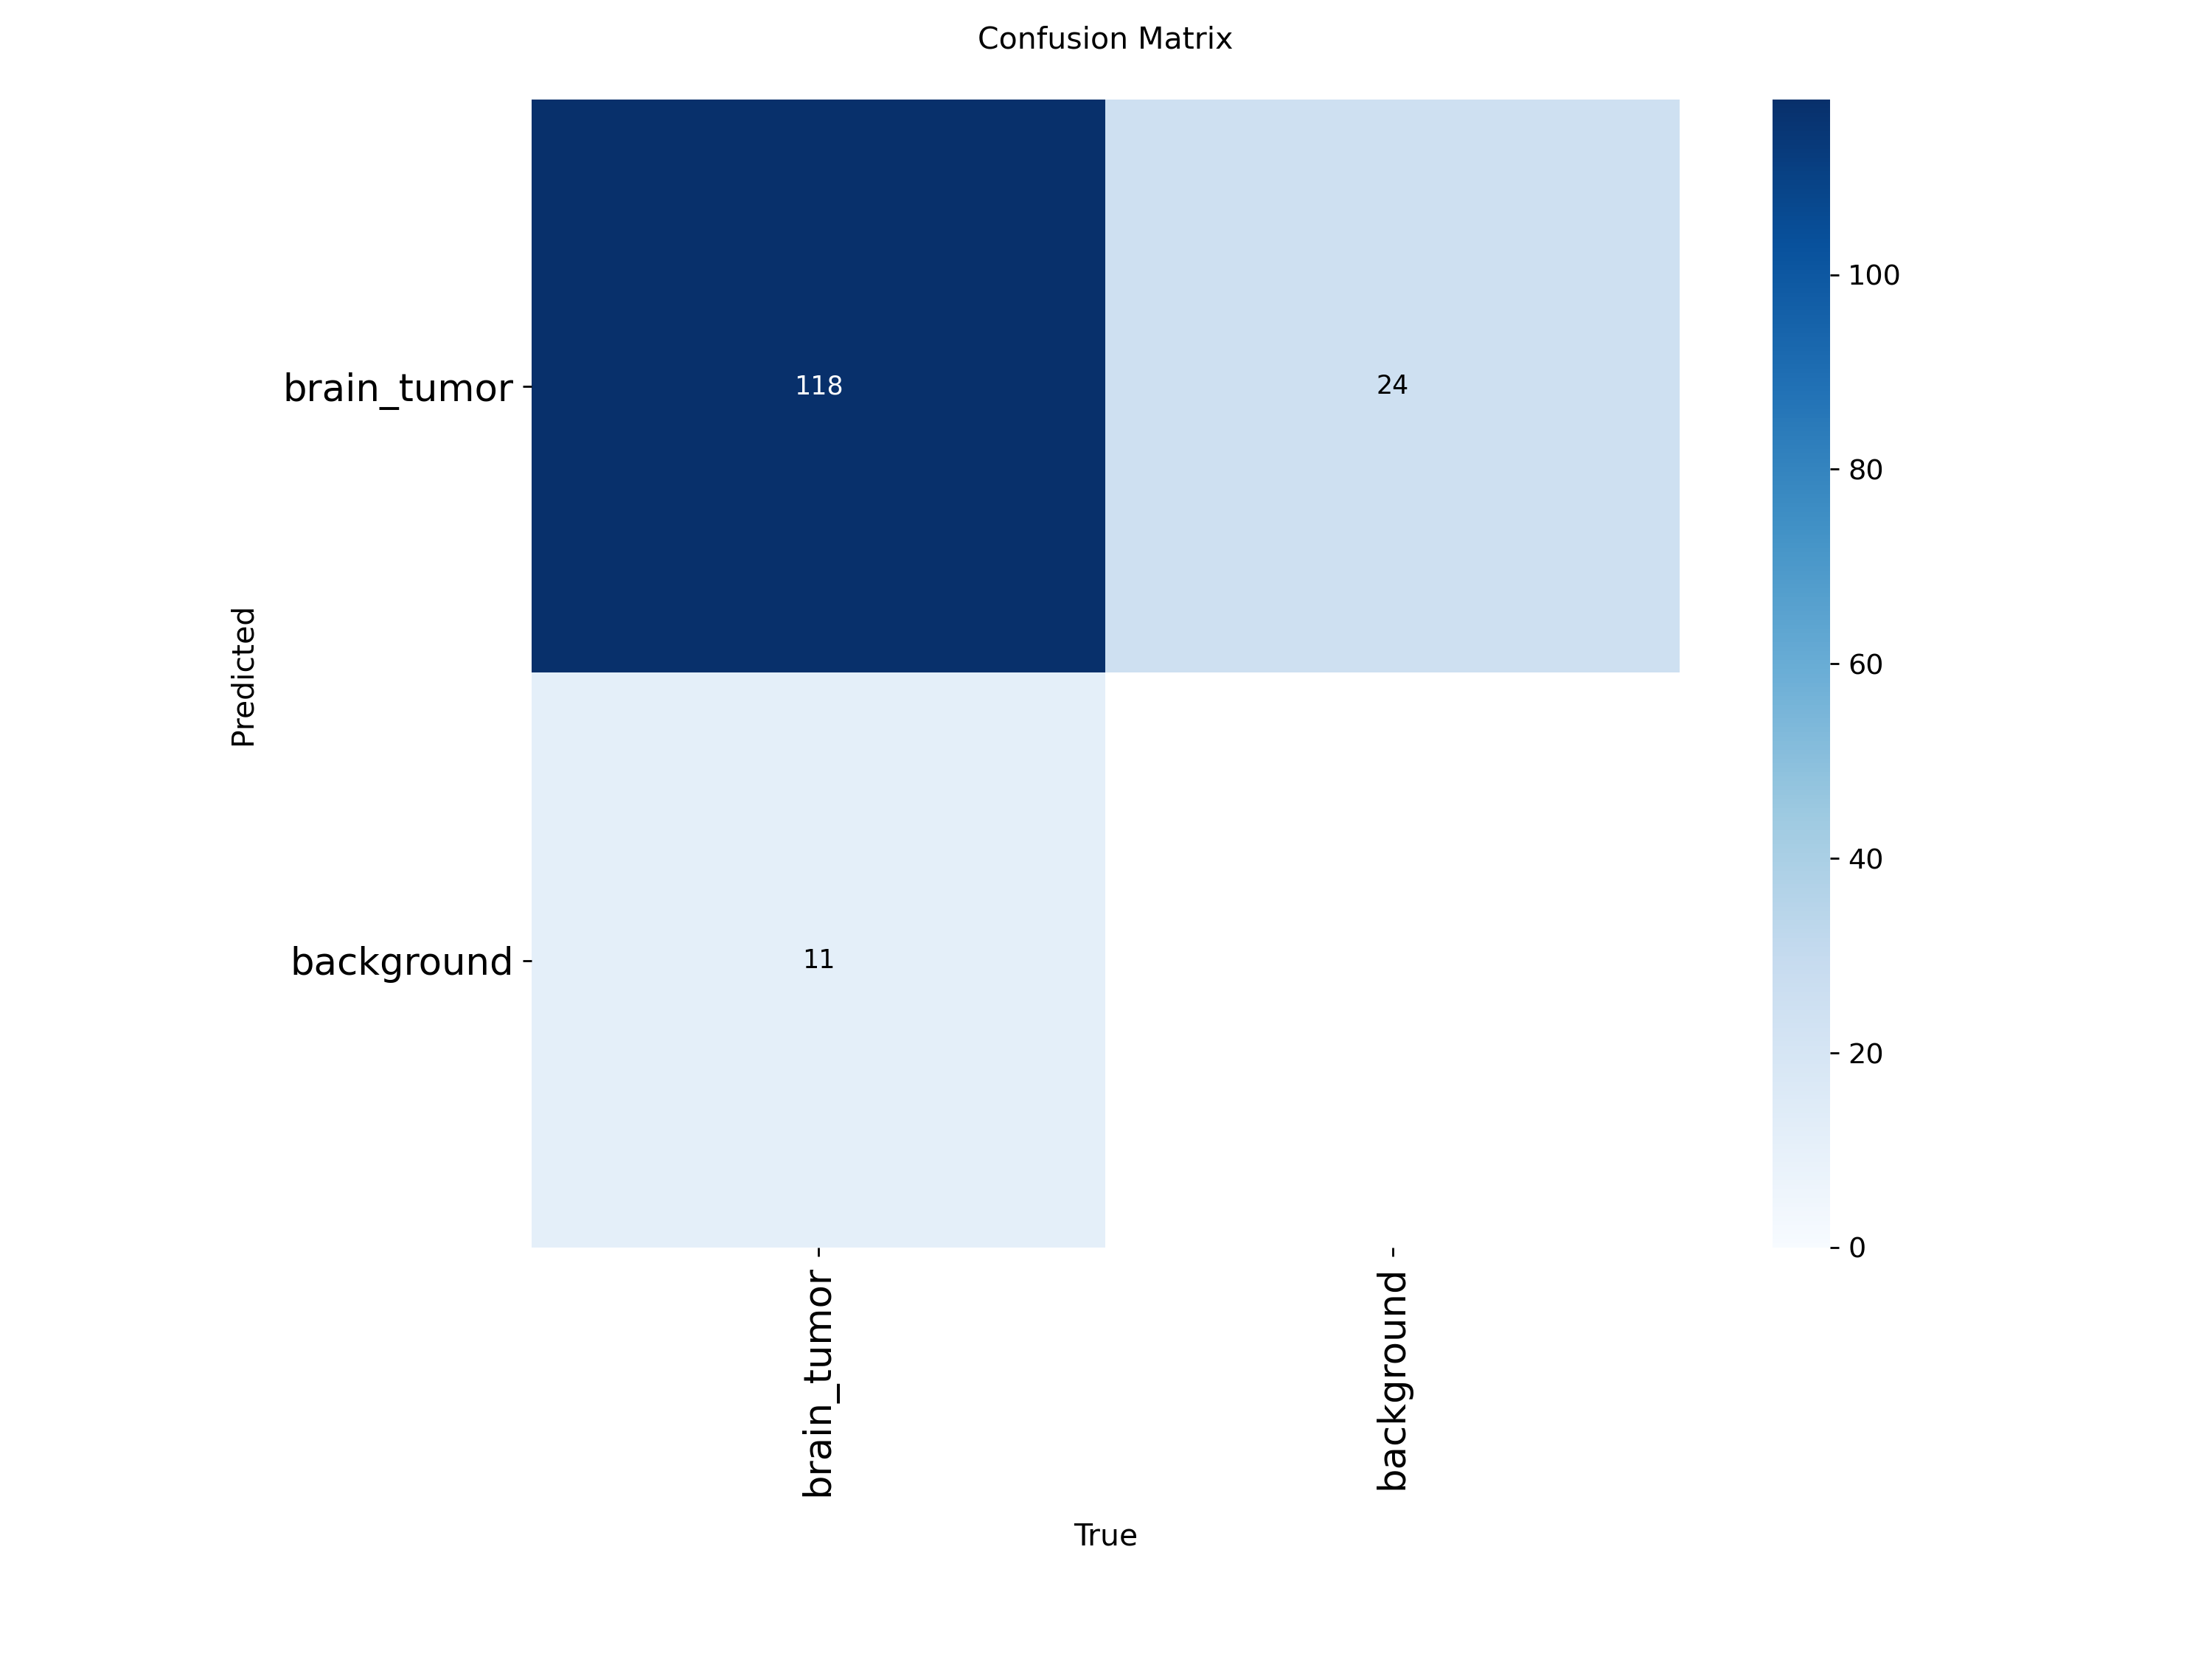

In [ ]:
from IPython.display import Image, display

base = "/content/drive/MyDrive/runs_yolov8s/train2"

# for name in ["results.png", "confusion_matrix.png"]:
print("results.png")
display(Image(filename=f"{base}/{"results.png"}"))

print("confusion_matrix.png")
display(Image(filename=f"{base}/{"confusion_matrix.png"}",width=800))


BoxPR_curve.png


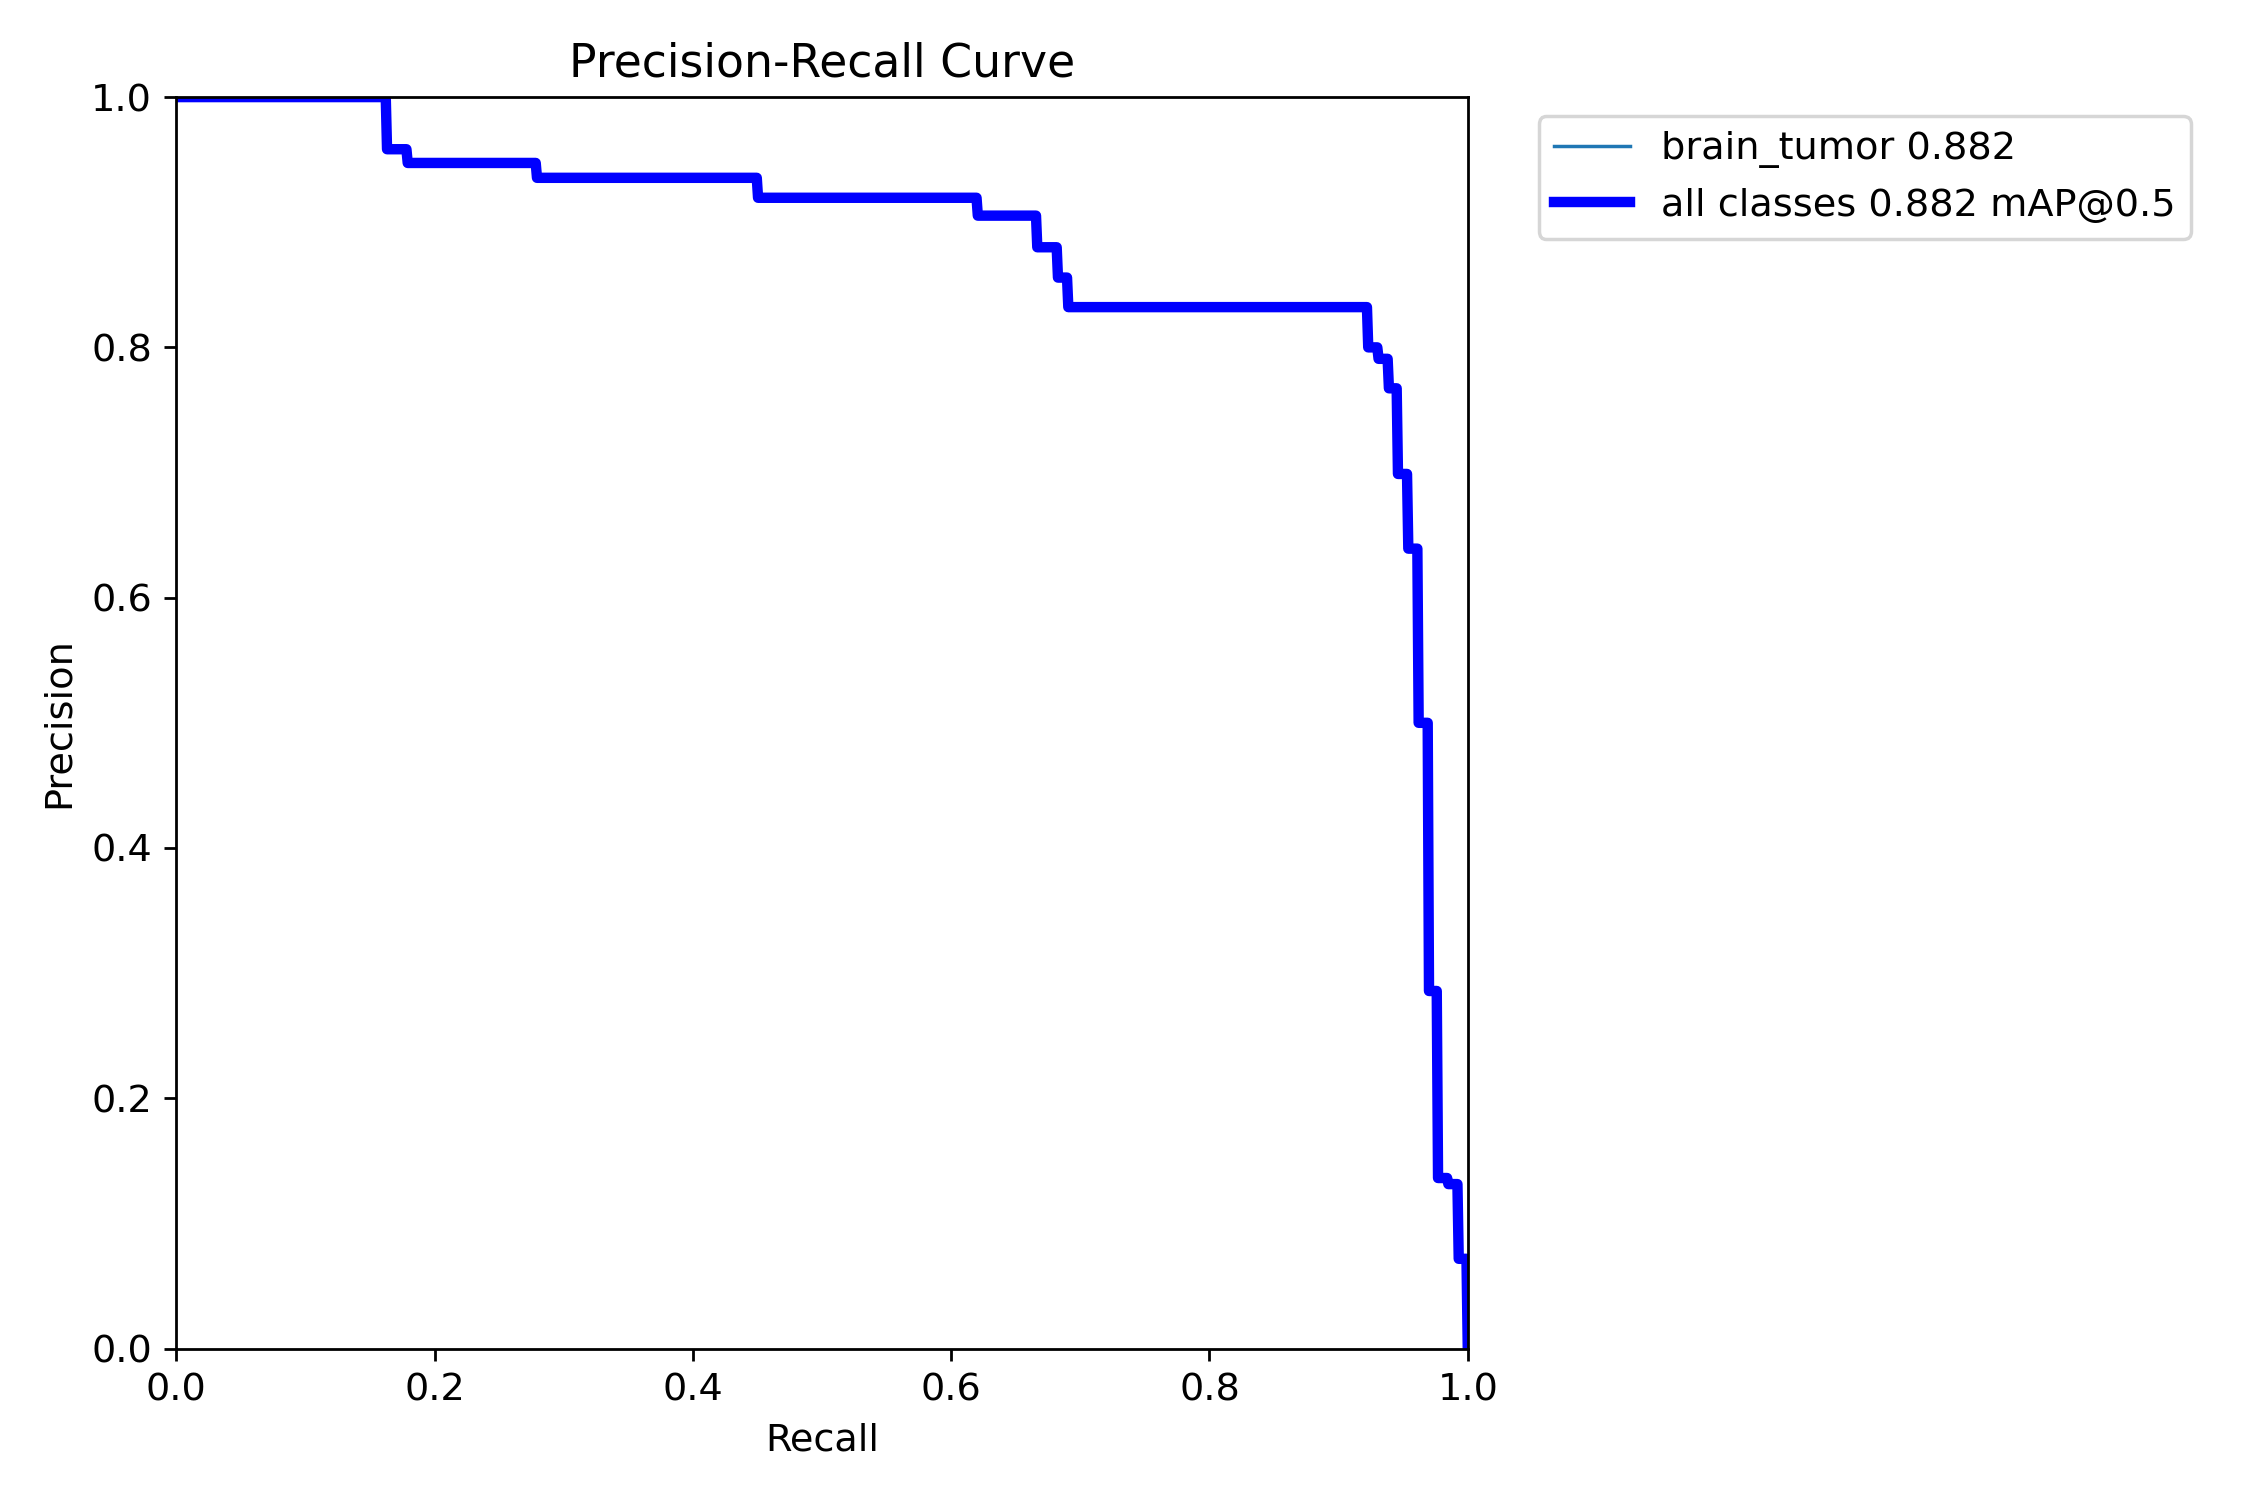

BoxR_curve.png


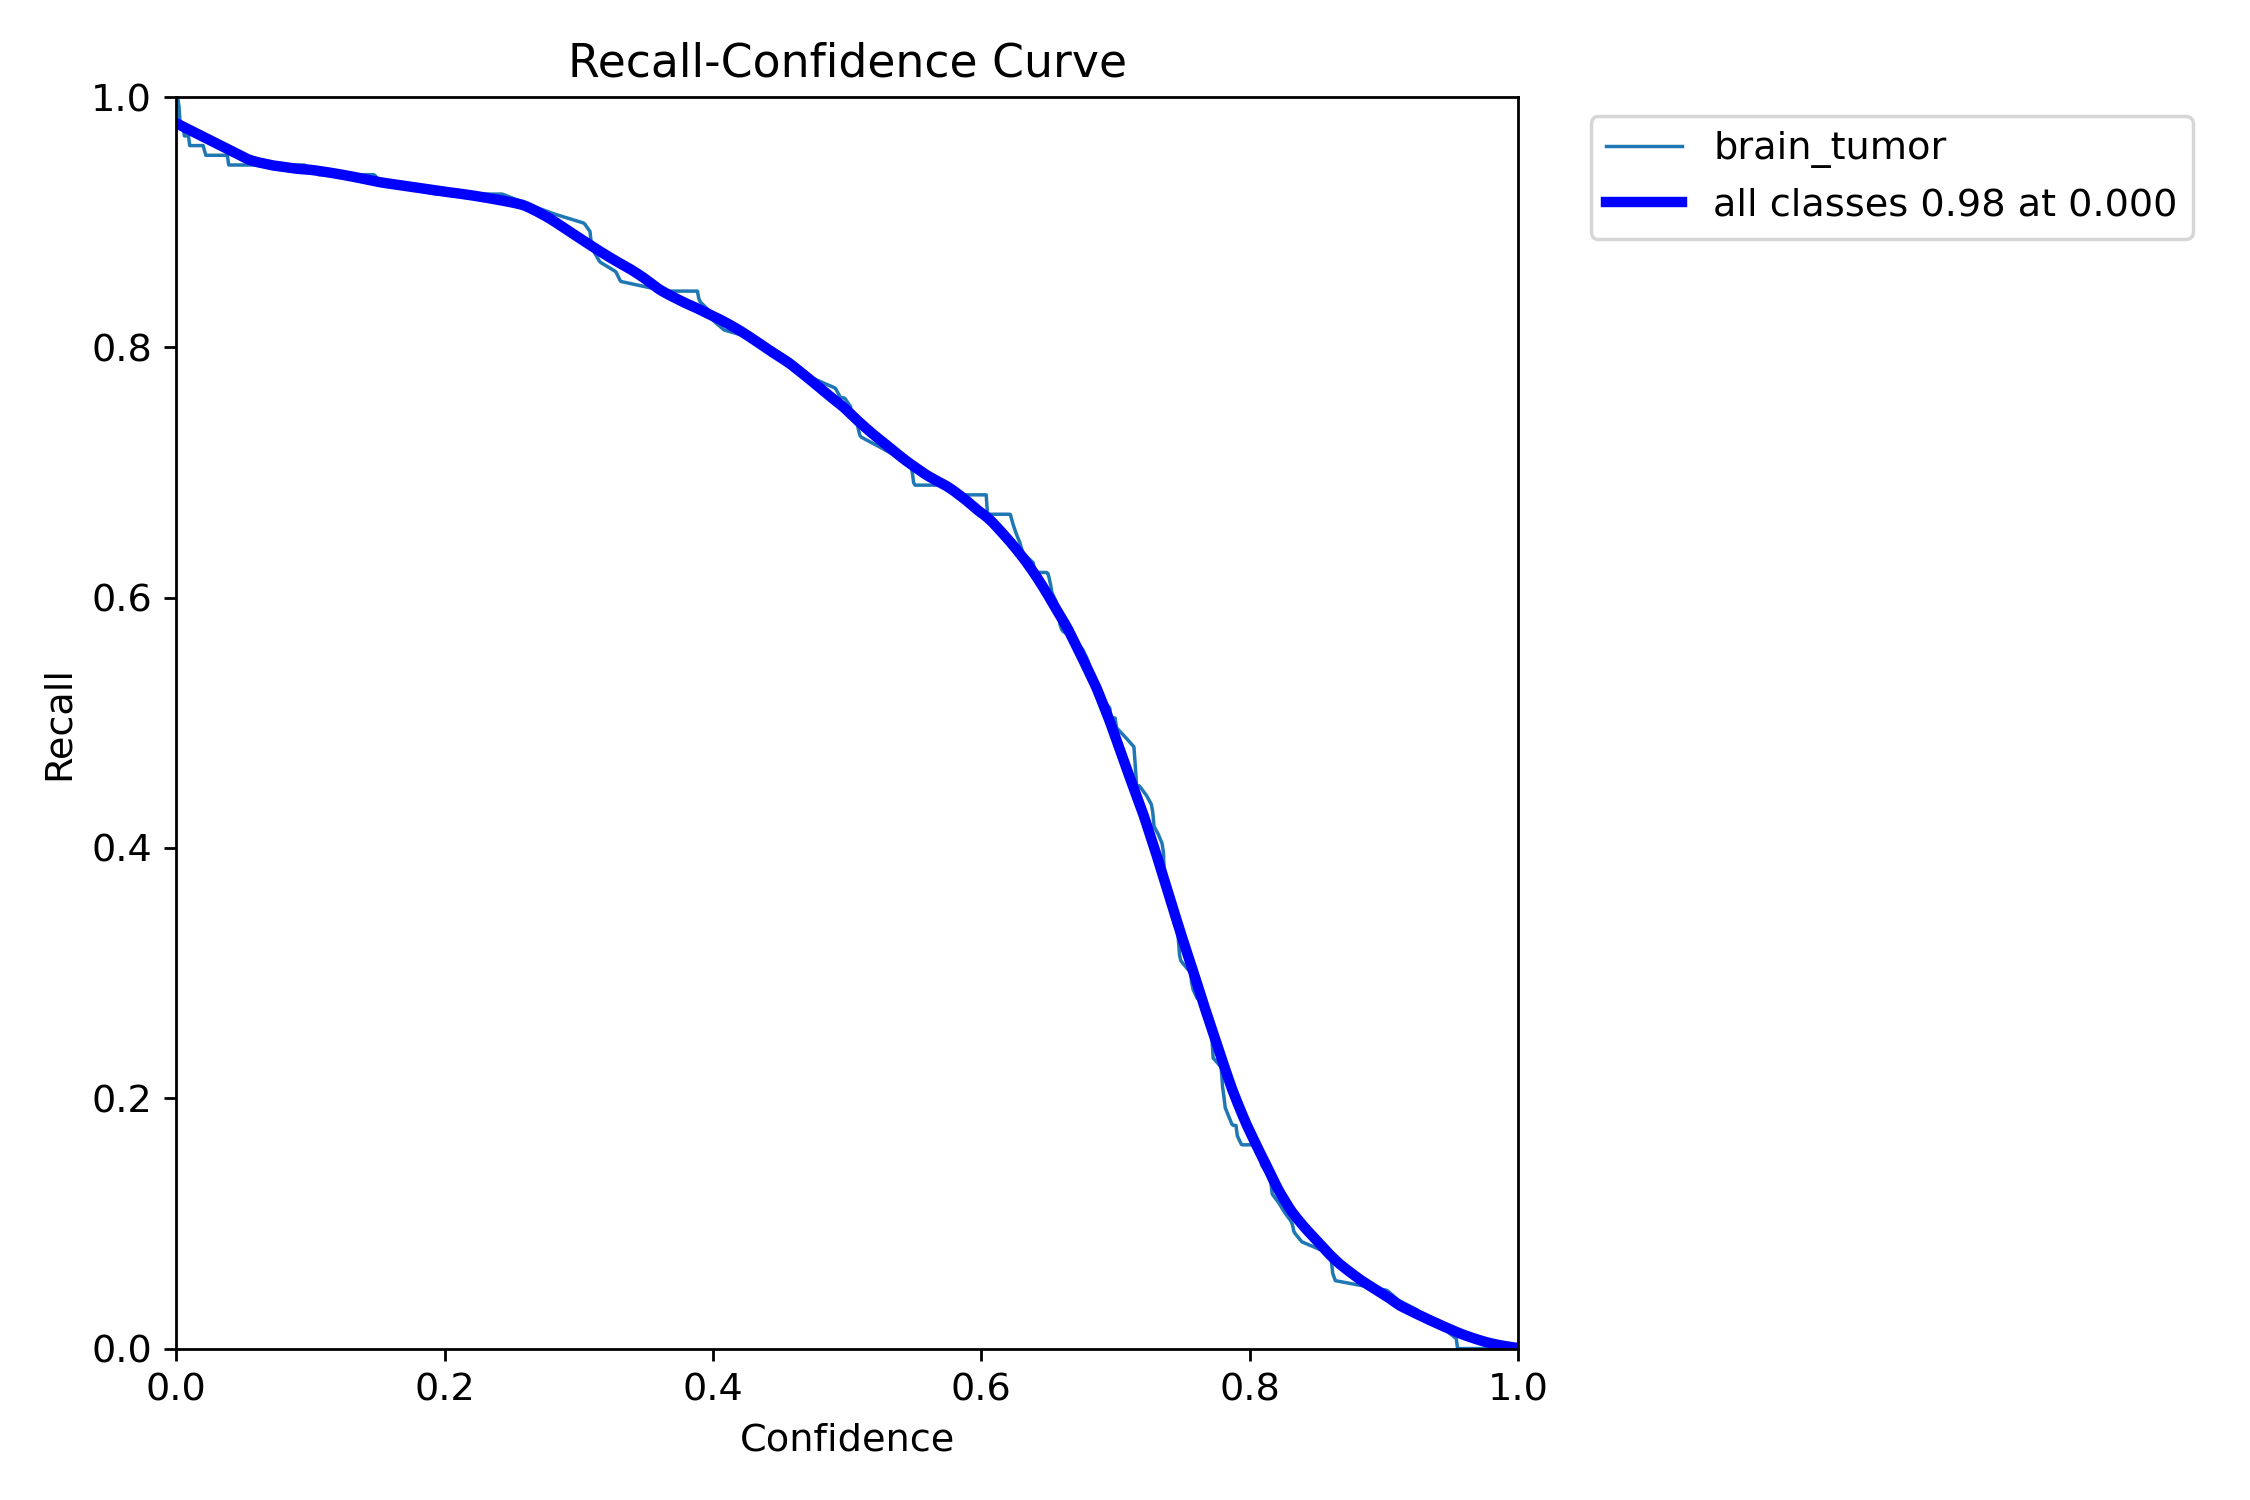

BoxF1_curve.png


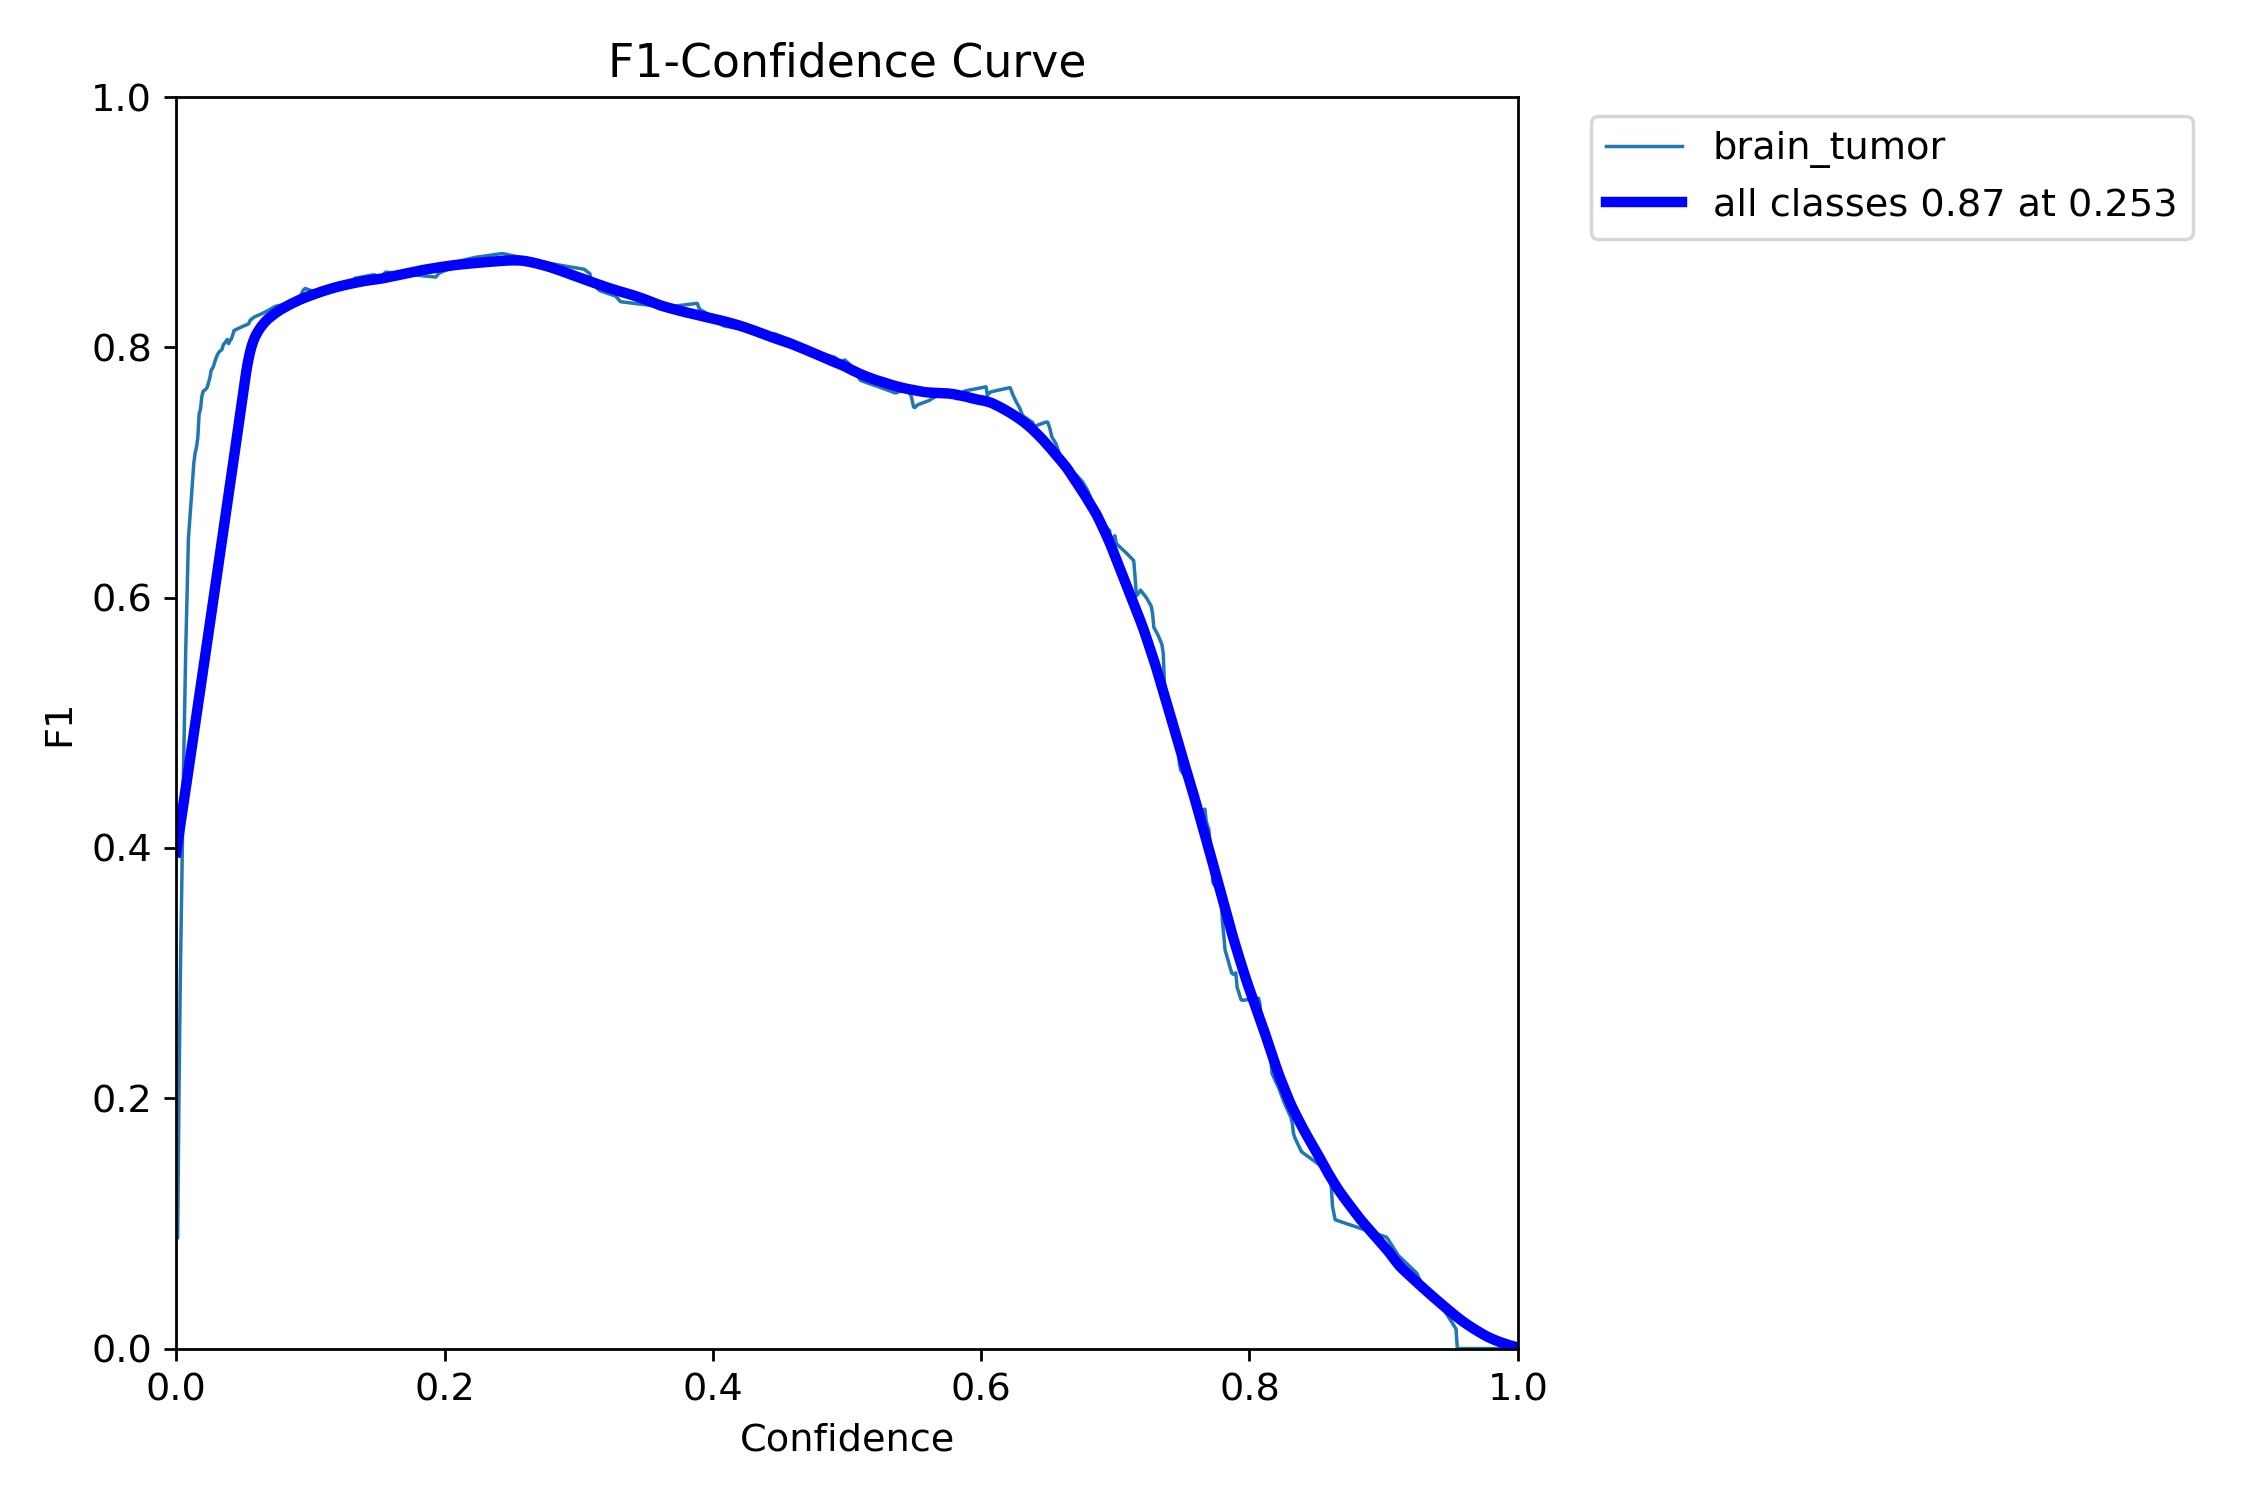

In [ ]:


for name in ["BoxPR_curve.png","BoxR_curve.png","BoxF1_curve.png"]:
    print(name)
    display(Image(filename=f"{base}/{name}",width=600))
